# 통계검정 및 피쳐선정
---

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 메세지 삭제
import warnings
warnings.filterwarnings('ignore')

# 한글 깨짐 방지
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

# 차트에 마이너스 출력
plt.rcParams['axes.unicode_minus'] = False

# 지수로 출력되는 값 없애기
pd.options.display.float_format = '{:.5f}'.format

In [7]:
df = pd.read_csv('../datasets/RAWDATA(0322).csv', index_col=0)

print(df.shape[0])
df

914


,영화명,개봉일,국적,전국스크린수,전국매출액,전국관객수,서울매출액,서울관객수,장르,영화구분,...,개봉일관객수,개봉일매출액,개봉일매출비율,타겟,배우가중치,감독가중치,0,1,2,3
0,명량,2014-07-30,1.00000,1587,135748398910,17613682,33121225810.00000,4163666,사극,1,...,682701.00000,4708879000.00000,61.60000,0,39.00000,2.00000,0,1,0,0
1,극한직업,2019-01-23,1.00000,1978,139647979516,16264944,31858660536.00000,3638287,코미디,1,...,368582.00000,3004762990.00000,73.20000,1,21.00000,3.00000,0,1,0,0
2,신과함께-죄와 벌,2017-12-20,1.00000,1912,115698654137,14410754,27530825087.00000,3346172,판타지,1,...,406365.00000,2984150800.00000,63.20000,0,27.00000,3.00000,0,0,1,0
3,국제시장,2014-12-17,1.00000,966,110828014630,14245998,25842519330.00000,3233946,드라마,1,...,184756.00000,1356869800.00000,31.00000,0,29.00000,1.00000,0,0,1,0
4,어벤져스: 엔드게임,2019-04-24,0.00000,2835,122182694160,13934592,33577136860.00000,3597963,액션,1,...,1338729.00000,9678989600.00000,97.10000,0,22.00000,3.00000,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909,스파이 브릿지,2015-11-05,0.00000,425,2015360478,260721,722246378.00000,90018,스릴러,1,...,18404.00000,135278300.00000,5.60000,1,0.33333,0.10000,0,0,1,0
910,함정,2015-09-10,1.00000,445,2088685200,257716,411417600.00000,50477,스릴러,1,...,32277.00000,250255800.00000,13.10000,0,0.63333,0.03333,1,0,0,0
911,파이널 데스티네이션5,2011-09-08,0.00000,168,2370348500,257193,880006000.00000,87499,공포(호러),1,...,12613.00000,118032500.00000,7.50000,1,0.03333,0.06667,1,0,0,0
912,언브로큰,2015-01-07,0.00000,401,1997947292,256475,605776392.00000,75489,액션,1,...,26707.00000,199398300.00000,5.80000,1,0.23333,0.03333,0,1,0,0


전체 데이터 수 : 914
초과수익달성 데이터 수 : 461
초과수익미달 데이터 수 : 453


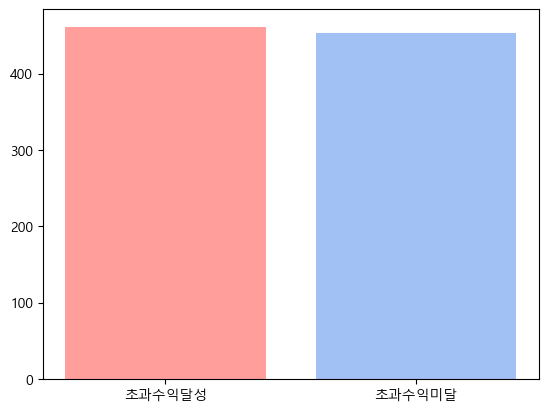

In [8]:
# 데이터 비율 확인
print("전체 데이터 수 :", df.shape[0])
print("초과수익달성 데이터 수 :", df[df["타겟"]==1].shape[0])
print("초과수익미달 데이터 수 :", df[df["타겟"]==0].shape[0])

# --------------
x = np.arange(2)
years = ['초과수익달성', '초과수익미달']
values = [df[df["타겟"]==1].shape[0], df[df["타겟"]==0].shape[0]]

plt.bar(x, values, color=["#FF9E9B", "#A1C0F4"])
plt.xticks(x, years)

plt.show()

In [9]:
df.head()

,영화명,개봉일,국적,전국스크린수,전국매출액,전국관객수,서울매출액,서울관객수,장르,영화구분,...,개봉일관객수,개봉일매출액,개봉일매출비율,타겟,배우가중치,감독가중치,0,1,2,3
0,명량,2014-07-30,1.00000,1587,135748398910,17613682,33121225810.00000,4163666,사극,1,...,682701.00000,4708879000.00000,61.60000,0,39.00000,2.00000,0,1,0,0
1,극한직업,2019-01-23,1.00000,1978,139647979516,16264944,31858660536.00000,3638287,코미디,1,...,368582.00000,3004762990.00000,73.20000,1,21.00000,3.00000,0,1,0,0
2,신과함께-죄와 벌,2017-12-20,1.00000,1912,115698654137,14410754,27530825087.00000,3346172,판타지,1,...,406365.00000,2984150800.00000,63.20000,0,27.00000,3.00000,0,0,1,0
3,국제시장,2014-12-17,1.00000,966,110828014630,14245998,25842519330.00000,3233946,드라마,1,...,184756.00000,1356869800.00000,31.00000,0,29.00000,1.00000,0,0,1,0
4,어벤져스: 엔드게임,2019-04-24,0.00000,2835,122182694160,13934592,33577136860.00000,3597963,액션,1,...,1338729.00000,9678989600.00000,97.10000,0,22.00000,3.00000,0,0,1,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 914 entries, 0 to 913
Data columns (total 25 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   영화명      914 non-null    object 
 1   개봉일      914 non-null    object 
 2   국적       914 non-null    float64
 3   전국스크린수   914 non-null    int64  
 4   전국매출액    914 non-null    int64  
 5   전국관객수    914 non-null    int64  
 6   서울매출액    914 non-null    float64
 7   서울관객수    914 non-null    int64  
 8   장르       914 non-null    object 
 9   영화구분     914 non-null    int64  
 10  개봉연도     914 non-null    int64  
 11  평균 제작비   914 non-null    float64
 12  국내배급사    914 non-null    float64
 13  상장배급사    914 non-null    float64
 14  주요배급사    914 non-null    int64  
 15  개봉일관객수   914 non-null    float64
 16  개봉일매출액   914 non-null    float64
 17  개봉일매출비율  914 non-null    float64
 18  타겟       914 non-null    int64  
 19  배우가중치    914 non-null    float64
 20  감독가중치    914 non-null    float64
 21  0        914 non

In [11]:
### 영화명, 개봉일, 장르, 영화구분, 평균 제작비 컬럼 삭제
df2 = df.drop(['영화명', '개봉일', '장르', '평균 제작비', '영화구분'], axis=1)

In [12]:
df2

,국적,전국스크린수,전국매출액,전국관객수,서울매출액,서울관객수,개봉연도,국내배급사,상장배급사,주요배급사,개봉일관객수,개봉일매출액,개봉일매출비율,타겟,배우가중치,감독가중치,0,1,2,3
0,1.00000,1587,135748398910,17613682,33121225810.00000,4163666,2014,0.00000,1.00000,1,682701.00000,4708879000.00000,61.60000,0,39.00000,2.00000,0,1,0,0
1,1.00000,1978,139647979516,16264944,31858660536.00000,3638287,2019,0.00000,1.00000,1,368582.00000,3004762990.00000,73.20000,1,21.00000,3.00000,0,1,0,0
2,1.00000,1912,115698654137,14410754,27530825087.00000,3346172,2017,0.00000,1.00000,1,406365.00000,2984150800.00000,63.20000,0,27.00000,3.00000,0,0,1,0
3,1.00000,966,110828014630,14245998,25842519330.00000,3233946,2014,0.00000,1.00000,1,184756.00000,1356869800.00000,31.00000,0,29.00000,1.00000,0,0,1,0
4,0.00000,2835,122182694160,13934592,33577136860.00000,3597963,2019,1.00000,0.00000,1,1338729.00000,9678989600.00000,97.10000,0,22.00000,3.00000,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909,0.00000,425,2015360478,260721,722246378.00000,90018,2015,1.00000,0.00000,1,18404.00000,135278300.00000,5.60000,1,0.33333,0.10000,0,0,1,0
910,1.00000,445,2088685200,257716,411417600.00000,50477,2015,0.00000,0.00000,0,32277.00000,250255800.00000,13.10000,0,0.63333,0.03333,1,0,0,0
911,0.00000,168,2370348500,257193,880006000.00000,87499,2011,1.00000,0.00000,1,12613.00000,118032500.00000,7.50000,1,0.03333,0.06667,1,0,0,0
912,0.00000,401,1997947292,256475,605776392.00000,75489,2015,1.00000,0.00000,1,26707.00000,199398300.00000,5.80000,1,0.23333,0.03333,0,1,0,0


In [13]:
# 결측치, 무한값 0으로 대체
df2.replace([np.nan, np.inf, -np.inf], 0, inplace=True)

In [14]:
df3 = df2[['0', '1', '2', '3', '국적','국내배급사', '상장배급사', '주요배급사']]
df3['개봉연도1'] = df2['개봉연도']
df2.drop(columns=['0', '1', '2', '3', '국적', '국내배급사', '상장배급사', '주요배급사'], axis=1, inplace=True)

In [15]:
df3_train = df3[df3['개봉연도1'] < 2018]
df3_test = df3[df3['개봉연도1'] >= 2018]

In [17]:
df3_train.reset_index(drop=True, inplace=True)
df3_test.reset_index(drop=True, inplace=True)

In [18]:
df3_train

,0,1,2,3,국적,국내배급사,상장배급사,주요배급사,개봉연도1
0,0,1,0,0,1.00000,0.00000,1.00000,1,2014
1,0,0,1,0,1.00000,0.00000,1.00000,1,2017
2,0,0,1,0,1.00000,0.00000,1.00000,1,2014
3,0,1,0,0,1.00000,0.00000,1.00000,1,2015
4,0,1,0,0,1.00000,0.00000,1.00000,1,2012
...,...,...,...,...,...,...,...,...,...
744,0,0,1,0,0.00000,1.00000,0.00000,1,2015
745,1,0,0,0,1.00000,0.00000,0.00000,0,2015
746,1,0,0,0,0.00000,1.00000,0.00000,1,2011
747,0,1,0,0,0.00000,1.00000,0.00000,1,2015


# Train-Test Split

In [19]:
## 2018년 기준으로 train, test 분리
df_train = df2[df2['개봉연도'] < 2018]
df_test = df2[df2['개봉연도'] >= 2018]

In [20]:
X_train = df_train.drop(columns=['타겟'], axis=1)
y_train = df_train['타겟']

X_test = df_test.drop(columns=['타겟'], axis=1)
y_test = df_test['타겟']

## 스케일링

- Min Max
- Standard(채택)
- Robust

In [21]:
## Standard Train셋 스케일링
from sklearn.preprocessing import StandardScaler

# StandardScaler객체 생성
scaler_stan = StandardScaler()
scaler_stan.fit(X_train)
data_scaled_stan = scaler_stan.transform(X_train)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
X_train_stan = pd.DataFrame(data = data_scaled_stan, columns=X_train.columns)

In [22]:
## Standard Train셋 스케일링
from sklearn.preprocessing import StandardScaler

# StandardScaler객체 생성
scaler_stan = StandardScaler()
scaler_stan.fit(X_train)
data_scaled_stan = scaler_stan.transform(X_test)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
X_test_stan = pd.DataFrame(data = data_scaled_stan, columns=X_test.columns)

In [24]:
print(X_train_stan.shape, X_test_stan.shape)

(749, 11) (165, 11)


In [25]:
X_train_stan = pd.concat([X_train_stan, df3_train],axis=1)
X_test_stan = pd.concat([X_test_stan, df3_test],axis=1)

In [26]:
X_train_stan.drop(columns=['개봉연도1'], axis=1, inplace=True)
X_test_stan.drop(columns=['개봉연도1'], axis=1, inplace=True)

In [27]:
## Min-Max df_EDA
df_EDA = pd.concat([X_train_stan,X_test_stan], axis=0, ignore_index=True)
df_EDA

,전국스크린수,전국매출액,전국관객수,서울매출액,서울관객수,개봉연도,개봉일관객수,개봉일매출액,개봉일매출비율,배우가중치,감독가중치,0,1,2,3,국적,국내배급사,상장배급사,주요배급사
0,3.03269,6.68964,6.78220,5.81939,5.99721,0.18846,4.77579,4.32392,2.21529,11.15654,5.40532,0,1,0,0,1.00000,0.00000,1.00000,1
1,4.05612,5.57708,5.39490,4.68895,4.64697,1.50358,2.48388,2.42019,2.30602,7.63342,8.31581,0,0,1,0,1.00000,0.00000,1.00000,1
2,1.07717,5.30680,5.32353,4.34756,4.46161,0.18846,0.64587,0.62402,0.48022,8.22060,2.49483,0,0,1,0,1.00000,0.00000,1.00000,1
3,1.38577,4.98478,4.95511,4.53437,4.55480,0.62683,2.54902,2.58029,0.74105,9.68857,11.22630,0,1,0,0,1.00000,0.00000,1.00000,1
4,1.41096,4.35446,4.77662,4.39749,4.84969,-0.68829,2.73461,2.45838,1.97715,7.63342,5.40532,0,1,0,0,1.00000,0.00000,1.00000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909,-0.07851,-0.67625,-0.67876,-0.75705,-0.75748,1.94195,-0.85315,-0.84202,-1.23218,-0.21533,-0.31864,0,0,0,1,0.00000,1.00000,0.00000,1
910,0.69614,-0.66017,-0.67917,-0.68469,-0.70252,2.38033,-0.05141,0.08857,-0.58578,-0.21533,-0.22162,0,0,1,0,0.00000,0.00000,1.00000,1
911,0.94176,-0.67187,-0.69143,-0.70222,-0.73316,2.38033,-0.14836,-0.20010,-0.31361,-0.21533,-0.31864,0,0,1,0,0.00000,1.00000,0.00000,1
912,-1.25938,-0.66496,-0.69865,-0.65758,-0.69369,2.38033,-0.05551,0.17166,-0.82393,-0.23490,-0.41565,0,0,0,1,1.00000,0.00000,1.00000,1


In [28]:
df_EDA.replace([np.nan, np.inf, -np.inf], 0, inplace=True)

In [29]:
df_EDA.isna().sum()

전국스크린수     0
전국매출액      0
전국관객수      0
서울매출액      0
서울관객수      0
개봉연도       0
개봉일관객수     0
개봉일매출액     0
개봉일매출비율    0
배우가중치      0
감독가중치      0
0          0
1          0
2          0
3          0
국적         0
국내배급사      0
상장배급사      0
주요배급사      0
dtype: int64

In [30]:
df_EDA

,전국스크린수,전국매출액,전국관객수,서울매출액,서울관객수,개봉연도,개봉일관객수,개봉일매출액,개봉일매출비율,배우가중치,감독가중치,0,1,2,3,국적,국내배급사,상장배급사,주요배급사
0,3.03269,6.68964,6.78220,5.81939,5.99721,0.18846,4.77579,4.32392,2.21529,11.15654,5.40532,0,1,0,0,1.00000,0.00000,1.00000,1
1,4.05612,5.57708,5.39490,4.68895,4.64697,1.50358,2.48388,2.42019,2.30602,7.63342,8.31581,0,0,1,0,1.00000,0.00000,1.00000,1
2,1.07717,5.30680,5.32353,4.34756,4.46161,0.18846,0.64587,0.62402,0.48022,8.22060,2.49483,0,0,1,0,1.00000,0.00000,1.00000,1
3,1.38577,4.98478,4.95511,4.53437,4.55480,0.62683,2.54902,2.58029,0.74105,9.68857,11.22630,0,1,0,0,1.00000,0.00000,1.00000,1
4,1.41096,4.35446,4.77662,4.39749,4.84969,-0.68829,2.73461,2.45838,1.97715,7.63342,5.40532,0,1,0,0,1.00000,0.00000,1.00000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909,-0.07851,-0.67625,-0.67876,-0.75705,-0.75748,1.94195,-0.85315,-0.84202,-1.23218,-0.21533,-0.31864,0,0,0,1,0.00000,1.00000,0.00000,1
910,0.69614,-0.66017,-0.67917,-0.68469,-0.70252,2.38033,-0.05141,0.08857,-0.58578,-0.21533,-0.22162,0,0,1,0,0.00000,0.00000,1.00000,1
911,0.94176,-0.67187,-0.69143,-0.70222,-0.73316,2.38033,-0.14836,-0.20010,-0.31361,-0.21533,-0.31864,0,0,1,0,0.00000,1.00000,0.00000,1
912,-1.25938,-0.66496,-0.69865,-0.65758,-0.69369,2.38033,-0.05551,0.17166,-0.82393,-0.23490,-0.41565,0,0,0,1,1.00000,0.00000,1.00000,1


## 샤피로 테스트

In [31]:
from scipy import stats
from scipy.stats import shapiro

def Shapiro(df_EDA):
    Shapi = []
    Shapi.append([col for col in df_EDA])
    for i in Shapi:
        for j in i:
            shapiro_test,p_val = shapiro(df_EDA[j])
            print(j,"Test-statistics : {}, p-value : {}". format(shapiro_test,p_val))

Shapiro(df_EDA.iloc[:,:])

전국스크린수 Test-statistics : 0.8877502679824829, p-value : 3.238689400502659e-25
전국매출액 Test-statistics : 0.6801402568817139, p-value : 2.505402824102998e-38
전국관객수 Test-statistics : 0.68244868516922, p-value : 3.158343168489311e-38
서울매출액 Test-statistics : 0.7058534622192383, p-value : 3.5825914913939368e-37
서울관객수 Test-statistics : 0.7062832117080688, p-value : 3.751339439792e-37
개봉연도 Test-statistics : 0.940634548664093, p-value : 1.203297569129358e-18
개봉일관객수 Test-statistics : 0.6585032939910889, p-value : 3.045640936899059e-39
개봉일매출액 Test-statistics : 0.646583080291748, p-value : 9.987320401951193e-40
개봉일매출비율 Test-statistics : 0.8814780116081238, p-value : 7.950137737627028e-26
배우가중치 Test-statistics : 0.21423554420471191, p-value : 0.0
감독가중치 Test-statistics : 0.2594134211540222, p-value : 0.0
0 Test-statistics : 0.38685137033462524, p-value : 0.0
1 Test-statistics : 0.6196509599685669, p-value : 8.965227315057315e-41
2 Test-statistics : 0.5829020738601685, p-value : 4.146442155937134e-42
3 

## 앤더슨

In [32]:
# 엔달슨 - 달링
from scipy import stats
from scipy.stats import anderson

def Anderson(df_EDA):
    ander = []
    ander.append([col for col in df_EDA])
    for i in ander:
        for j in i:
            anderson_test = anderson(df_EDA[j], dist='norm')
            print(j,anderson_test)

Anderson(df_EDA)

전국스크린수 AndersonResult(statistic=24.670516367831397, critical_values=array([0.574, 0.653, 0.784, 0.914, 1.087]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=0.2563818953762442, scale=1.2056264913061832)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
전국매출액 AndersonResult(statistic=85.70964827809871, critical_values=array([0.574, 0.653, 0.784, 0.914, 1.087]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=0.05068857016100259, scale=1.0786461198838442)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
전국관객수 AndersonResult(statistic=85.32537465280575, critical_values=array([0.574, 0.653, 0.784, 0.914, 1.087]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=0.033986737797389026, scale=1.048008230884559)
 success: True
 message: '`anderson` successfully fit the distribution to the

## 0. Heatmap

<AxesSubplot: >

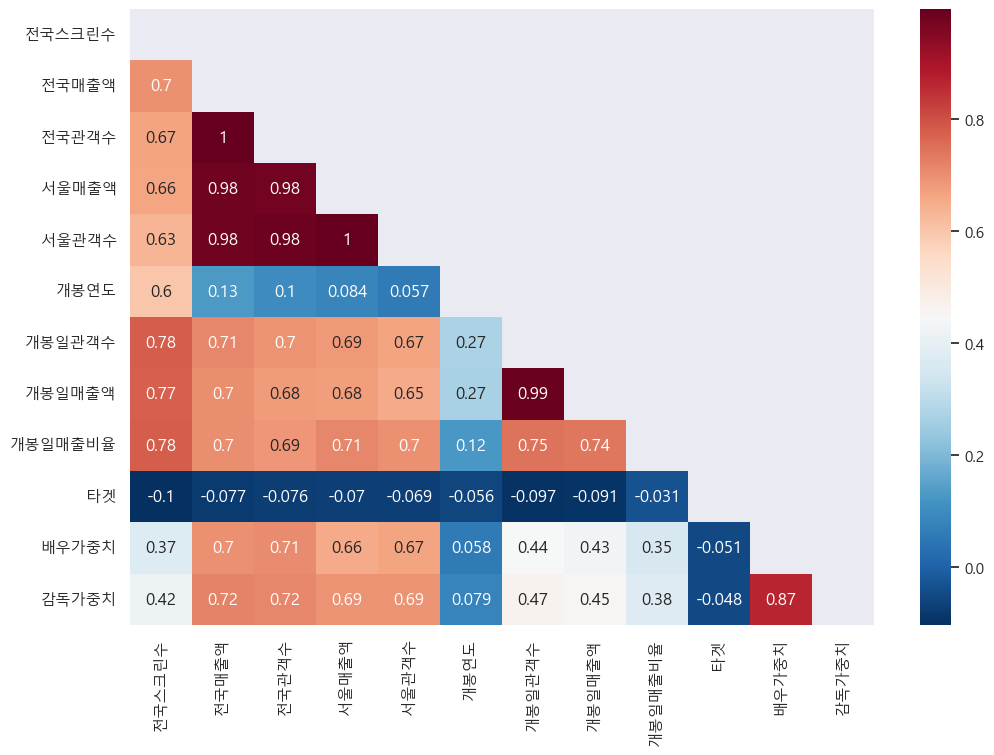

In [33]:
df_cor = df2.corr(method='pearson')

sns.set(rc = {'figure.figsize':(12,8)})
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.heatmap(df_cor, xticklabels=df_cor.columns, yticklabels=df_cor.columns, cmap='RdBu_r', annot=True, mask=np.triu(df_cor))

In [36]:
## Train, Test셋 VIF 공선성 확인

def vif(data):
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # VIF 출력을 위한 데이터 프레임 형성
    vif = pd.DataFrame()

    # VIF 값과 각 Feature 이름에 대해 설정
    vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    vif["features"] = data.columns 

    # VIF 값이 높은 순으로 정렬
    vif = vif.sort_values(by="VIF Factor", ascending=False)
    vif = vif.reset_index().drop(columns='index')
    
    return vif

print(vif(X_train_stan))
print(vif(X_test_stan))

    VIF Factor features
0   2996.74731    전국관객수
1   2859.36831    전국매출액
2   2256.48712    서울관객수
3   2126.15672    서울매출액
4     78.32807   개봉일관객수
5     75.82031   개봉일매출액
6     11.46763   전국스크린수
7      6.63623  개봉일매출비율
8      5.80695    국내배급사
9      5.74246    상장배급사
10     5.53355        1
11     5.01089    배우가중치
12     4.40013    감독가중치
13     4.06151        2
14     3.04463     개봉연도
15     2.95037        0
16     2.78052        3
17     2.72119    주요배급사
18     2.15245       국적
    VIF Factor features
0   8518.82397    전국매출액
1   8509.63056    전국관객수
2   5373.46113    서울관객수
3   5364.71730    서울매출액
4     78.75237   개봉일관객수
5     73.06914   개봉일매출액
6     55.23636        2
7     50.09595        1
8     28.63163        3
9     13.73550    감독가중치
10    12.72332   전국스크린수
11    10.72915    배우가중치
12     9.29332  개봉일매출비율
13     7.90725        0
14     6.17346    국내배급사
15     5.08683    상장배급사
16     2.84953       국적
17     2.61942    주요배급사
18     1.29261     개봉연도


### 정규성검정 만족하는 컬럼 확인

In [37]:
# 정규성 검정을 하나의 함수로
from scipy.stats import shapiro, anderson, kstest, jarque_bera, normaltest

def normal_test(test_name,x):
    normal = []
    notnormal = []
    if test_name == 'shapiro':
        for var in x.columns :
            stat, p  = shapiro(x[var].values)
            alpha = 0.05
            if p > alpha :
                normal.append(var)
            else :
                notnormal.append(var)
                
    elif test_name == 'anderson':
        for var in x.columns :
            result  = anderson(x[var].values,dist='norm')
            normality = 0
            for i in range(len(result.critical_values)):
                # sl, cv = result.significance_level[i], result.critical_values[i]
                if result.statistic < result.critical_values[i]:
                    normality +=1
                else :
                    normality +=0
            if normality > 2.5 :
                normal.append(var)
            else :
                notnormal.append(var)
                
    elif test_name == 'kstest':
        for var in x.columns :
            stat,p  = kstest(x[var].values, "norm")
            alpha = 0.05
            if p > alpha :
                normal.append(var)
            else :
                notnormal.append(var)
    
    elif test_name == 'jarque_bera':
        for var in x.columns :
            stat,p  = jarque_bera(x[var].values)
            alpha = 0.05
            if p > alpha :
                normal.append(var)
            else :
                notnormal.append(var)
                
    elif test_name == 'normaltest':
        for var in x.columns :
            stat, p  = normaltest(x[var].values)
            alpha = 0.05
            if p > alpha :
                normal.append(var)
            else :
                notnormal.append(var)
    else:
        pass
    return pd.DataFrame(normal, columns = ['normal']),pd.DataFrame(notnormal, columns = ['notnormal'])

In [38]:
# 1) shapiro
## normal
## 귀무가설을 기각하지 못했다 -> 정규분포를 따른다
## notnormal
## 귀무가설을 기각 대립가설 채택 -> data 분포가 정규분포를 따르지 않는다.
normal_s,notnormal_s = normal_test('shapiro',X_train_stan)
normal_s

,normal


In [39]:
# 2) anderson test
normal_a,notnormal_a = normal_test('anderson',X_train_stan)
normal_a

,normal


In [40]:
# 3) ks test
normal_ks,notnormal_ks = normal_test('kstest',X_train_stan)
normal_ks

,normal


In [41]:
# 4) jarque_bera test
normal_jb,notnormal_jb = normal_test('jarque_bera',X_train_stan)
normal_jb

,normal


In [42]:
# 5) normaltest
normal_n,notnormal_n = normal_test('normaltest',X_train_stan)
normal_n

,normal


## 1. 등분산 검정

In [44]:
y_train = y_train.reset_index()
X_train_stan = X_train_stan.reset_index()

In [45]:
y_train.drop(columns=['index'], axis=1, inplace=True)
X_train_stan.drop(columns=['index'], axis=1, inplace=True)

In [46]:
x_등분산 = pd.concat([X_train_stan, y_train], axis=1)
x_등분산

,전국스크린수,전국매출액,전국관객수,서울매출액,서울관객수,개봉연도,개봉일관객수,개봉일매출액,개봉일매출비율,배우가중치,감독가중치,0,1,2,3,국적,국내배급사,상장배급사,주요배급사,타겟
0,3.03269,6.68964,6.78220,5.81939,5.99721,0.18846,4.77579,4.32392,2.21529,11.15654,5.40532,0,1,0,0,1.00000,0.00000,1.00000,1,0
1,4.05612,5.57708,5.39490,4.68895,4.64697,1.50358,2.48388,2.42019,2.30602,7.63342,8.31581,0,0,1,0,1.00000,0.00000,1.00000,1,0
2,1.07717,5.30680,5.32353,4.34756,4.46161,0.18846,0.64587,0.62402,0.48022,8.22060,2.49483,0,0,1,0,1.00000,0.00000,1.00000,1,0
3,1.38577,4.98478,4.95511,4.53437,4.55480,0.62683,2.54902,2.58029,0.74105,9.68857,11.22630,0,1,0,0,1.00000,0.00000,1.00000,1,1
4,1.41096,4.35446,4.77662,4.39749,4.84969,-0.68829,2.73461,2.45838,1.97715,7.63342,5.40532,0,1,0,0,1.00000,0.00000,1.00000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,-0.62644,-0.73123,-0.73402,-0.73204,-0.73115,0.62683,-0.73384,-0.72436,-0.96001,-0.19576,-0.12461,0,0,1,0,0.00000,1.00000,0.00000,1,1
745,-0.56346,-0.72716,-0.73532,-0.79489,-0.79646,0.62683,-0.61878,-0.59745,-0.53475,-0.10768,-0.31864,1,0,0,0,1.00000,0.00000,0.00000,0,0
746,-1.43573,-0.71153,-0.73554,-0.70014,-0.73531,-1.12666,-0.78187,-0.74339,-0.85228,-0.28383,-0.22162,1,0,0,0,0.00000,1.00000,0.00000,1,1
747,-0.70201,-0.73220,-0.73585,-0.75559,-0.75514,0.62683,-0.66498,-0.65358,-0.94867,-0.22511,-0.31864,0,1,0,0,0.00000,1.00000,0.00000,1,1


In [47]:
# H가 1인 경우 이분산성 / H가 0인 경우 등분산
from scipy.stats import bartlett
def bartlett_test(col, p_value = 0.05, H = 1):
    list= []
    for i in col:
        T, p_val =bartlett(x_등분산[x_등분산['타겟']==1][i], x_등분산[x_등분산['타겟']==0][i]) 
        list.append([i, p_val])

    list = pd.DataFrame(list, columns = ['변수', 'p_value'])
    if H == 1:
        a = list[(list['p_value'] < p_value)][['변수', 'p_value']].sort_values('p_value')
        return a
    else:
        a = list[(list['p_value'] >= p_value)][['변수', 'p_value']].sort_values('p_value')
        return a

In [48]:
# 이분산성 변수
x_hetero = bartlett_test(X_train_stan.columns, H = 1)
x_hetero

,변수,p_value
9,배우가중치,0.00000
2,전국관객수,0.00115
1,전국매출액,0.00226
10,감독가중치,0.02148
4,서울관객수,0.03300
11,0,0.04922


In [49]:
# 등분산성 변수
x_homo = bartlett_test(X_train_stan.columns, H = 0)
x_homo

,변수,p_value
3,서울매출액,0.09982
13,2,0.17713
6,개봉일관객수,0.28209
14,3,0.33221
16,국내배급사,0.53467
7,개봉일매출액,0.53731
18,주요배급사,0.61140
5,개봉연도,0.72855
8,개봉일매출비율,0.76625
0,전국스크린수,0.77976


In [50]:
set_이분산 = set(x_hetero["변수"])
set_등분산 = set(x_homo["변수"])
print(len(set_이분산))
print(len(set_등분산))

6
13


In [51]:
set_등분산

{'1',
 '2',
 '3',
 '개봉연도',
 '개봉일관객수',
 '개봉일매출비율',
 '개봉일매출액',
 '국내배급사',
 '국적',
 '상장배급사',
 '서울매출액',
 '전국스크린수',
 '주요배급사'}

In [52]:
set_이분산

{'0', '감독가중치', '배우가중치', '서울관객수', '전국관객수', '전국매출액'}

In [53]:
X_test.head()

,전국스크린수,전국매출액,전국관객수,서울매출액,서울관객수,개봉연도,개봉일관객수,개봉일매출액,개봉일매출비율,배우가중치,감독가중치
1,1978,139647979516,16264944,31858660536.00000,3638287,2019,368582.00000,3004762990.00000,73.20000,21.00000,3.00000
4,2835,122182694160,13934592,33577136860.00000,3597963,2019,1338729.00000,9678989600.00000,97.10000,22.00000,3.00000
6,2648,111596248720,13369064,27828487460.00000,3113576,2019,606618.00000,4943457300.00000,81.80000,6.00000,2.00000
10,1311,106955138359,12552283,30198375039.00000,3374837,2019,72736.00000,616644460.00000,25.20000,7.00000,3.00000
12,2235,102476768809,12253247,22905551759.00000,2636542,2018,1246603.00000,9684810000.00000,69.50000,24.00000,3.00000


## 3. t-test

In [54]:
# 2) t_test
import scipy.stats as stats
def t_test(col, col_h0, col_h1, p_value = 0.05):
    list= []
    for i in col:
        if (col_h0['변수']==i).any():
            t_stat, p_val = stats.ttest_ind(x_등분산[x_등분산['타겟']==1][i], x_등분산[x_등분산['타겟']==0][i], equal_var=True) # 등분산성 : wald t-test
            list.append([i, p_val])
        elif (col_h1['변수']==i).any():
            t_stat, p_val = stats.ttest_ind(x_등분산[x_등분산['타겟']==1][i], x_등분산[x_등분산['타겟']==0][i], equal_var=False) # 이분산성 : welch’s t-test
            list.append([i, p_val])

    list = pd.DataFrame(list, columns = ['변수', 'p_value'])
    a = list[(list['p_value'] < p_value)][['변수', 'p_value']].sort_values('p_value')
    return a

In [56]:
# 2) t_test 결과 p_value < 0.05보다 작은 유의한 변수 가져오기
x_ttest = t_test(X_train_stan.columns, x_homo, x_hetero, p_value=0.1)
print("유의한 피쳐 수 :", len(x_ttest))
x_ttest.sort_values(by="변수", ascending=True)

유의한 피쳐 수 : 3


,변수,p_value
13,2,0.03616
6,개봉일관객수,0.08989
0,전국스크린수,0.08942


In [58]:
ttest_col = list(x_ttest["변수"])

## 4. VIF

In [60]:
col_유의 = list(x_ttest["변수"])
X_train_유의 = X_train_stan[col_유의]

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 출력을 위한 데이터 프레임 형성
vif = pd.DataFrame()

# VIF 값과 각 Feature 이름에 대해 설정
vif["VIF Factor"] = [variance_inflation_factor(X_train_유의.values, i) for i in range(X_train_유의.shape[1])]
vif["features"] = X_train_유의.columns 

# VIF 값이 높은 순으로 정렬
vif = vif.sort_values(by="VIF Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
vif

,VIF Factor,features
0,2.74407,전국스크린수
1,2.71521,개봉일관객수
2,1.01774,2


## 5. Wrapper Method

- Stepwise

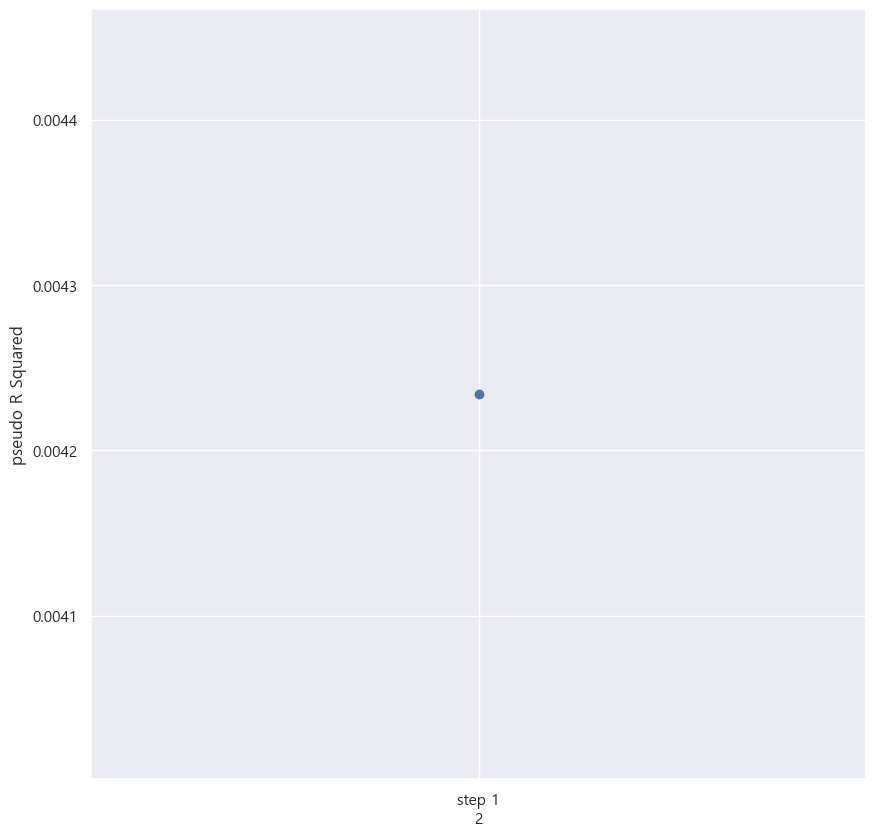

In [62]:
def stepwise_feature_selection(feature, target, variables):
    import statsmodels.api as sm
    import matplotlib.pyplot as plt
    import warnings
    import pandas as pd
    warnings.filterwarnings("ignore")
    
    y = target ## 반응 변수

    selected_variables = [] ## 선택된 변수들
    sl_enter = 0.1
    sl_remove = 0.1
    
    sv_per_step = [] ## 각 스텝별로 선택된 변수들
    r_squared = [] ## 각 스텝별 수정된 결정계수
    steps = [] ## 스텝
    step = 0
    while len(variables) > 0:
        remainder = list(set(variables) - set(selected_variables))
        pval = pd.Series(index=remainder) ## 변수의 p-value
        ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서
        ## 선형 모형을 적합한다.
        for col in remainder: 
            X = feature[selected_variables+[col]]
            X = sm.add_constant(X)
            model = sm.Logit(y,X).fit(disp=0)
            pval[col] = model.pvalues[col]
    
        min_pval = pval.min()
        if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
            selected_variables.append(pval.idxmin())
            ## 선택된 변수들에대해서
            ## 어떤 변수를 제거할지 고른다.
            while len(selected_variables) > 0:
                selected_X = feature[selected_variables]
                selected_X = sm.add_constant(selected_X)
                selected_pval = sm.Logit(y,selected_X).fit(disp=0).pvalues[1:]
                max_pval = selected_pval.max()
                if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                    remove_variable = selected_pval.idxmax()
                    selected_variables.remove(remove_variable)
                else:
                    break
            
            step += 1
            steps.append(step)
            presudo_r_squared = sm.Logit(y,sm.add_constant(feature[selected_variables])).fit(disp=0).prsquared
            r_squared.append(presudo_r_squared)
            sv_per_step.append(selected_variables.copy())
        else:
            break

    
    # 시각화
    fig = plt.figure(figsize=(10,10))
    plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)])
    plt.plot(steps,r_squared, marker='o')
    plt.ylabel('pseudo R Squared')
    plt.grid(True)
    plt.show()

    return selected_variables
    
selected_variables = stepwise_feature_selection(X_train_stan, y_train, X_train_stan.columns.tolist())

In [63]:
print(len(selected_variables))
selected_variables

1


['2']

## 6. Embbeded Method

- Lasso

In [64]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.simplefilter('ignore')

lasso_model = LogisticRegression()
param_grid = {'penalty' : ['l1'], 
                'C' : [0.1, 1, 2, 5, 10],
                'solver' : ['liblinear']}

grid_search = GridSearchCV(lasso_model, param_grid=param_grid, return_train_score=True, cv=5)
grid_search.fit(X_train_stan, y_train)

df_grid = pd.DataFrame(grid_search.cv_results_)
df_grid = df_grid.sort_values(by=['rank_test_score'], ascending=True)
df_grid[['params', 'mean_train_score', 'mean_test_score', 'rank_test_score']]
print('GridSearchCV 최적 파라미터:', grid_search.best_params_)
print('GridSearchCV 최고 정확도:{0:.4f}'.format(grid_search.best_score_))

GridSearchCV 최적 파라미터: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
GridSearchCV 최고 정확도:0.5394


In [66]:
lasso_best = LogisticRegression(C=1, penalty='l1', solver='liblinear').fit(X_train_stan, y_train)

df_lasso = pd.DataFrame()
df_lasso['feature'] = X_train_stan.columns
df_lasso['coef'] = lasso_best.coef_[0]
df_lasso.drop(df_lasso[df_lasso['coef']==0].index, inplace=True)
df_lasso

,feature,coef
0,전국스크린수,-0.54545
2,전국관객수,-0.02706
5,개봉연도,0.26599
6,개봉일관객수,-0.12281
8,개봉일매출비율,0.54472
9,배우가중치,-0.07412
10,감독가중치,0.11126
11,0,0.15027
13,2,-0.25308
14,3,0.13013


In [67]:
# 라쏘에서 선택된 피처
lasso_features = df_lasso['feature'].values.tolist()
print('Lasso에서 선택된 피처 수 {0:1.0f}'.format(len(df_lasso)), '개')
lasso_features

Lasso에서 선택된 피처 수 14 개


['전국스크린수',
 '전국관객수',
 '개봉연도',
 '개봉일관객수',
 '개봉일매출비율',
 '배우가중치',
 '감독가중치',
 '0',
 '2',
 '3',
 '국적',
 '국내배급사',
 '상장배급사',
 '주요배급사']

## 7. Filter Method

- selectKBest : 각 피쳐와 타겟 사이의 통계적 관계(상관계수)를 계산 후, 유의미하다고 판단되는 피처를 선택하는 방식, 피처 선택 후 따로 모델 적용이 필요가 없다.

In [68]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

f_classif_selector = SelectKBest(f_classif, k=13)
f_classif_selector.fit(X_train_stan, y_train)

f_classif_scores = pd.DataFrame()
f_classif_scores['Feature'] = X_train_stan.columns
f_classif_scores['Support'] = f_classif_selector.get_support()
f_classif_scores[f_classif_scores["Support"]==True]

,Feature,Support
0,전국스크린수,True
1,전국매출액,True
2,전국관객수,True
3,서울매출액,True
4,서울관객수,True
6,개봉일관객수,True
7,개봉일매출액,True
9,배우가중치,True
11,0,True
13,2,True


In [69]:
list_kbest = list(f_classif_scores[f_classif_scores["Support"]==True]["Feature"])
print(len(list_kbest))
list_kbest

13


['전국스크린수',
 '전국매출액',
 '전국관객수',
 '서울매출액',
 '서울관객수',
 '개봉일관객수',
 '개봉일매출액',
 '배우가중치',
 '0',
 '2',
 '3',
 '국적',
 '국내배급사']

## 8. 중복 Feature 확인

In [70]:
list_ttest = list(ttest_col)
list_stepwise = list(selected_variables)
list_lasso = list(lasso_features)
list_kbest = list(list_kbest)
list_col_all = df.columns

In [71]:
def func_ttest(x):
    if x in list_ttest:
        return 1
    else:
        return 0

def func_stepwise(x):
    if x in list_stepwise:
        return 1
    else:
        return 0

def func_lasso(x):
    if x in list_lasso:
        return 1
    else:
        return 0

def func_kbest(x):
    if x in list_kbest:
        return 1
    else:
        return 0

In [72]:
feature_counts = pd.DataFrame()
feature_counts['Feature'] = list_col_all
feature_counts['ttest'] = list_col_all.map(func_ttest)
feature_counts['stepwise'] = list_col_all.map(func_stepwise)
feature_counts['lasso'] = list_col_all.map(func_lasso)
feature_counts['kbest'] = list_col_all.map(func_kbest)

feature_counts["total"] = feature_counts["ttest"]+feature_counts["stepwise"]+feature_counts["lasso"]+feature_counts["kbest"]
feature_final = feature_counts[feature_counts["total"]>=2]
list_feature_final = list(feature_final["Feature"])
print("선택된 피쳐수 :", len(list_feature_final))
feature_final

선택된 피쳐수 : 9


,Feature,ttest,stepwise,lasso,kbest,total
2,국적,0,0,1,1,2
3,전국스크린수,1,0,1,1,3
5,전국관객수,0,0,1,1,2
12,국내배급사,0,0,1,1,2
15,개봉일관객수,1,0,1,1,3
19,배우가중치,0,0,1,1,2
21,0,0,0,1,1,2
23,2,1,1,1,1,4
24,3,0,0,1,1,2


In [73]:
df_fs = X_train_stan[list_feature_final]
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 출력을 위한 데이터 프레임 형성
vif = pd.DataFrame()

# VIF 값과 각 Feature 이름에 대해 설정
vif["VIF Factor"] = [variance_inflation_factor(df_fs.values, i) for i in range(df_fs.shape[1])]
vif["features"] = df_fs.columns 

# VIF 값이 높은 순으로 정렬
vif = vif.sort_values(by="VIF Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
vif

,VIF Factor,features
0,3.89006,전국관객수
1,3.19900,개봉일관객수
2,3.13083,전국스크린수
3,2.09850,배우가중치
4,1.58462,국내배급사
5,1.46652,2
6,1.38684,국적
7,1.30368,0
8,1.23668,3


<AxesSubplot: >

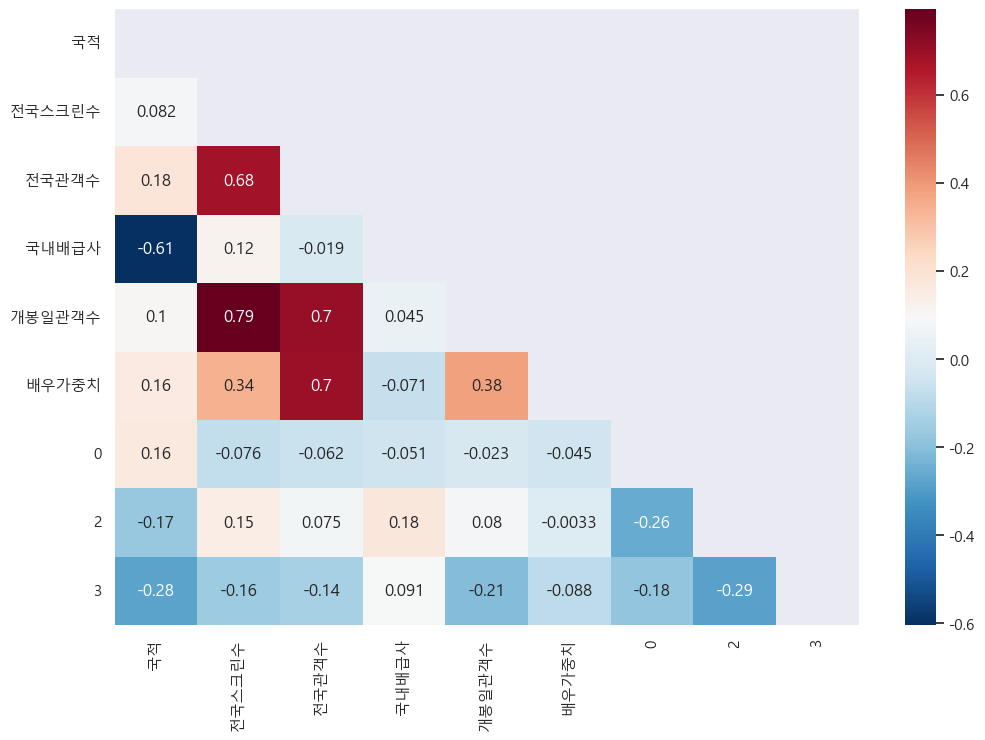

In [74]:
df_fs_cor = df_fs.corr(method='pearson')

sns.set(rc = {'figure.figsize':(12,8)})
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.heatmap(df_fs_cor, xticklabels=df_fs_cor.columns, yticklabels=df_fs_cor.columns, cmap='RdBu_r', annot=True, mask=np.triu(df_fs_cor))

In [75]:
df.columns

Index(['영화명', '개봉일', '국적', '전국스크린수', '전국매출액', '전국관객수', '서울매출액', '서울관객수', '장르',
       '영화구분', '개봉연도', '평균 제작비', '국내배급사', '상장배급사', '주요배급사', '개봉일관객수', '개봉일매출액',
       '개봉일매출비율', '타겟', '배우가중치', '감독가중치', '0', '1', '2', '3'],
      dtype='object')

In [79]:
stan_df = df.drop(columns=['영화명', '개봉일', '장르', '평균 제작비', '영화구분', '전국매출액', '서울매출액', '서울관객수', '주요배급사', '개봉일매출액'], axis=1)

In [80]:
stan_df.to_csv('../datasets/Stan_RAW.csv')